In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
%matplotlib notebook

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
# Note: In case of RuntimeError "Make sure the Graphviz executables are on your system's path” after installing Graphviz 
# helps on mac:  brew install graphviz
# helps on windows:  import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

In [8]:
iris= load_iris()

iris = load_iris()
X, y, features, labels = iris.data, iris.target,iris.feature_names ,iris.target_names

print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)
print ('features:', features)
dict_names = {i:v for i,v in enumerate(labels)}
print ('target names :', dict_names)

X.shape=  (150, 4)
y.shape=  (150,)
X_train.shape=  (112, 4)
X_test.shape=  (38, 4)
y_train.shape=  (112,)
y_test.shape=  (38,)
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names : {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [9]:
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 98.214%
test accuracy= 97.368%


In [10]:
# fn=  os.path.join(path , 'restricted_depth.gv')
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

'Source.gv.pdf'

In [11]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(10, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)

<IPython.core.display.Javascript object>


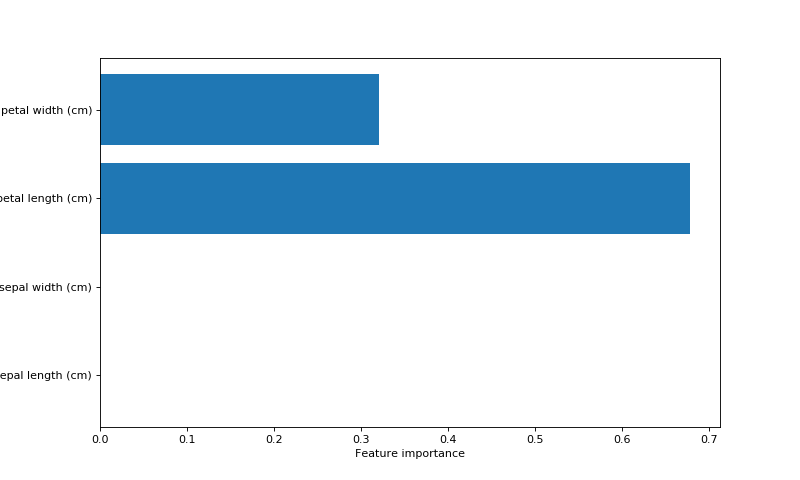

In [12]:
plot_feature_importances(clf, features)

In [13]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.05,plot_symbol_size = 50, ax= None,  is_extended=True, title_size= None):

    '''    
    Draws the binary decision boundary for X that is nor required additional features and transformation (like polynomial)
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_points = np.array(['grey', 'orange']) # neg/pos
    colors_for_areas = np.array(['grey', 'orange']) # neg/pos  # alpha is applied later 
    cmap_light = ListedColormap(colors_for_areas)
 
   
    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples 
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

    print ('Call prediction for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape 
    Z = Z.reshape(xx1.shape)
    
    if ax:
        plt.sca(ax)
    
    # Plot all meshgrid prediction      
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, 
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, 
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        # Create legend  
        import matplotlib.patches as mpatches # use to assign lavels for colored points 
        patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
        patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
        plt.legend(handles=[patch0, patch1])
    
    fontdict={'fontsize': title_size} if title_size else None
    
    plt.title(title, fontdict)
    if is_extended:
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False, 
        labelbottom = False
        )

        
    
def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)

    
def plot_multi_class_logistic_regression(X,y,dict_names=None, colors= None,  title =None):
    '''
    Draw the multi class samples of 2 features
    :param X: X 2 ndarray (m,2),
    :param y: vector (m,)
    :param dict_names: dict of values of y and names
    :return: None
    '''
    if not colors:
        colors_for_points = ['green','grey', 'orange', 'brown']
    else:
         colors_for_points = colors

    y_unique = list(set(y))

    for i in range (len(y_unique)):
        ind = y == y_unique[i] # vector

        if dict_names:
            plt.scatter(X[ind,0], X[ind,1], c=colors_for_points[i], s=40, label=dict_names[y_unique[i]],edgecolor='black', alpha=.7)
        else:
            plt.scatter(X[ind, 0], X[ind, 1], s=40, c=colors_for_points [i], edgecolor = 'black', alpha = 0.7)
    if title:
        plt.title(title)

    if dict_names:
        plt.legend(frameon=True)

In [14]:
from sklearn.datasets import make_blobs

<IPython.core.display.Javascript object>


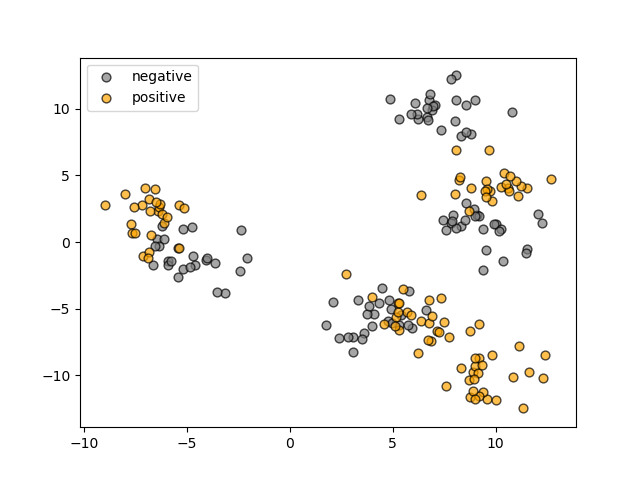

In [15]:
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 8, # centers impacts for y
                       cluster_std = 1.3, random_state = 4)
X_train = X_mk8
y_train = y_mk8 % 2 # make it binary since make_blobs  with centers = 8 creates y in [0..7]
plt.figure()
plot_data_logistic_regression(X_mk8,y_train)

<IPython.core.display.Javascript object>


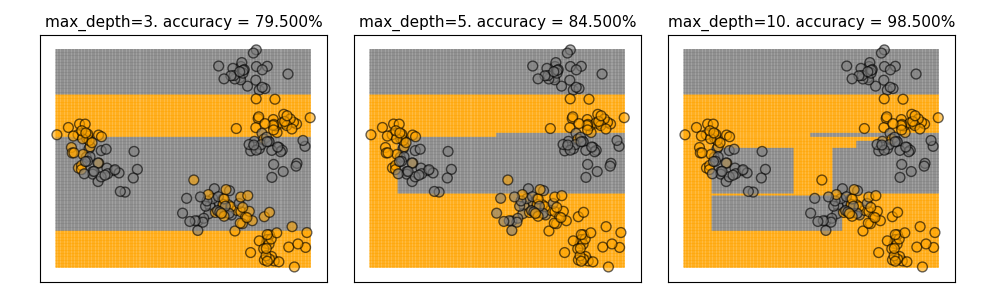

Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)
Call prediction for all grid values (precision of drawing = 0.05,
 you may configure to speed up e.g. precision=0.05)


In [16]:
plt.figure(figsize= (10,3))
max_depths= [3,5,10]    

for i, max_depth in enumerate(max_depths):
    ax = plt.subplot(1,len(max_depths),i+1)
    clf = DecisionTreeClassifier(
        criterion=  'entropy',
        random_state=20,        
        max_depth=max_depth,    
    #     max_leaf_nodes=4,
    ).fit(X_train, y_train)
    accuracy = clf.score (X_train, y_train)
#     print("train accuracy= {:.3%}".format(accuracy))
    plot_decision_boundary(
        clf,
        X_train,
        y_train,
        precision= 0.05,
        ax=ax,
        title = 'max_depth={}. accuracy = {:.3%}'.format(max_depth, accuracy),
        is_extended= False,
        title_size= 11,)
    
plt.tight_layout (w_pad=-2)


# max_depth=5    
# clf = DecisionTreeClassifier(
#     criterion=  'entropy',
#     random_state=20,        
#     max_depth=max_depth,    
# #     max_leaf_nodes=4,
# ).fit(X_train, y_train)
# accuracy = clf.score (X_train, y_train)
# print("train accuracy= {:.3%}".format(accuracy))
# plt.figure()

# plot_decision_boundary(clf, X_train, y_train, precision= 0.05, title = 'max_depth={}. accuracy = {:.3%}'.format(max_depth, accuracy))


In [17]:
graph_viz = tree.export_graphviz(clf, out_file=None,filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

'Source.gv.pdf'

In [18]:
import os
import pandas as pd
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')
fn=  os.path.join(path , 'tennis.csv')
df = pd.read_csv(fn)
del df['temp']
print (df.head())

X_train = df.iloc[:, :3].values
y_train = df.iloc[:, 3].values
print ('\nX_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)

FileNotFoundError: File b'C:\\Users\\admin\\Desktop\\DataCamp\\new\\data\\tennis.csv' does not exist

In [19]:
from sklearn.preprocessing  import LabelEncoder

In [20]:
X_train_cat = X_train.copy()
le = LabelEncoder()
for i in range(X_train.shape[1]):
    X_train_cat[:,i]= le.fit_transform(X_train[:,i])
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    print ('{}: {}'.format(list(df)[i], le_dict))
y_train_cat= le.fit_transform(y_train)
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print ('y: ', le_dict)
print ('X_train_cat.shape= ',X_train_cat.shape)
print ('y_train_cat.shape= ',y_train_cat.shape)
X_train_cat

NameError: name 'df' is not defined

In [21]:
max_depth = None
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train_cat, y_train_cat)
features = list(df)[:3]
labels = ['No','Yes']
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

NameError: name 'y_train_cat' is not defined

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
iris = load_iris()
X, y, features, labels = iris.data, iris.target,iris.feature_names ,iris.target_names

print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)
print ('features:', features)
dict_names = {i:v for i,v in enumerate(labels)}
print ('target names :', dict_names)

X.shape=  (150, 4)
y.shape=  (150,)
X_train.shape=  (112, 4)
X_test.shape=  (38, 4)
y_train.shape=  (112,)
y_test.shape=  (38,)
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names : {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [24]:
clf = RandomForestClassifier().fit (X_train, y_train)
clf.score (X_train, y_train)
n_estimators_list= [5,10,20]
max_features_list= list(np.arange(1, X_train.shape[1]+1))

for i in range (len(n_estimators_list)): 
    for j in range (len(max_features_list)):
        index = len(max_features_list)*i+j           
        clf = RandomForestClassifier(
            n_estimators= n_estimators_list[i],
            max_features=max_features_list[j],        
        ).fit(X_train, y_train)
        accuracy_train = clf.score (X_train, y_train)
        accuracy_test = clf.score (X_test, y_test)
        print ('n_estimators= {}, max_features = {}, accuracy_train = {:.3%}, accuracy_test = {:.3%}'.format (
            n_estimators_list[i],max_features_list[j], accuracy_train, accuracy_test))

print ('Comparing  to desicion tree clf')
max_depth = 3
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
#     max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

C:\Users\admin\Anaconda31\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


n_estimators= 5, max_features = 1, accuracy_train = 100.000%, accuracy_test = 92.105%
n_estimators= 5, max_features = 2, accuracy_train = 99.107%, accuracy_test = 94.737%
n_estimators= 5, max_features = 3, accuracy_train = 98.214%, accuracy_test = 94.737%
n_estimators= 5, max_features = 4, accuracy_train = 99.107%, accuracy_test = 97.368%
n_estimators= 10, max_features = 1, accuracy_train = 99.107%, accuracy_test = 92.105%
n_estimators= 10, max_features = 2, accuracy_train = 99.107%, accuracy_test = 97.368%
n_estimators= 10, max_features = 3, accuracy_train = 100.000%, accuracy_test = 94.737%
n_estimators= 10, max_features = 4, accuracy_train = 99.107%, accuracy_test = 97.368%
n_estimators= 20, max_features = 1, accuracy_train = 100.000%, accuracy_test = 94.737%
n_estimators= 20, max_features = 2, accuracy_train = 100.000%, accuracy_test = 97.368%
n_estimators= 20, max_features = 3, accuracy_train = 100.000%, accuracy_test = 97.368%
n_estimators= 20, max_features = 4, accuracy_train = 

In [25]:
import os
import pandas as pd
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')
fn=  os.path.join(path , 'mushrooms.csv')
# https://www.kaggle.com/ymotonskillupai/mushroomscsv
df = pd.read_csv(fn)

print (list(df))
X = df.iloc[:, 1:].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print ('\nX_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
df.head()

FileNotFoundError: File b'C:\\Users\\admin\\Desktop\\DataCamp\\new\\data\\mushrooms.csv' does not exist

In [26]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()
le = LabelEncoder()
for i in range(X_train.shape[1]):
    X_train_cat[:,i]= le.fit_transform(X_train[:,i])
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    print (X_test[:,i])
    X_test_cat[:,i] = le.transform(X_test[:,i])
y_train_cat= le.fit_transform(y_train)
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print ('y: ', le_dict)
y_test_cat= le.transform(y_test)
print ('X_train_cat.shape= ',X_train_cat.shape)
print ('y_train_cat.shape= ',y_train_cat.shape)
X_train_cat

[4.6 4.6 5.4 5.  5.7 7.7 5.5 4.6 6.3 6.7 5.6 4.4 5.8 5.5 6.7 5.  6.3 7.7
 5.7 4.4 6.2 6.8 6.9 6.8 5.4 7.2 6.1 5.8 4.9 6.7 5.8 4.8 6.9 6.6 4.4 5.2
 6.7 4.5]


ValueError: y contains previously unseen labels: [4.4, 4.5]

In [27]:
max_features_list = [20,12, 10,8,6,4,3,2,1]    
for i, max_features in enumerate(max_features_list):
    clf = DecisionTreeClassifier(
        random_state=0,        
        max_features= max_features,    
    ).fit(X_train_cat, y_train_cat)
    accuracy_train = clf.score(X_train_cat, y_train_cat)
    accuracy_test = clf.score(X_test_cat, y_test_cat)
    print ('max_features = {}:\n\t accuracy_train = {:.3%}\n\t accuracy_test = {:.3%}'.format (
        max_features_list[i], accuracy_train, accuracy_test))

NameError: name 'y_train_cat' is not defined

In [28]:
print ('Comparing  to desicion tree clf')
max_depth = None
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=0,        
    max_depth=max_depth,    
).fit(X_train_cat, y_train_cat)
print("train accuracy= {:.3%}".format(clf.score (X_train_cat, y_train_cat)))
print("test accuracy= {:.3%}".format(clf.score (X_test_cat, y_test_cat)))

Comparing  to desicion tree clf


NameError: name 'y_train_cat' is not defined

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
import os
cwd = os.getcwd() 
path = os.path.join(cwd,'data')
fn =  os.path.join(path , 'fruit_data_with_colors.txt')
df_fruits = pd.read_table(fn)
df_fruits.head(10)

FileNotFoundError: File b'C:\\Users\\admin\\Desktop\\DataCamp\\new\\data\\fruit_data_with_colors.txt' does not exist

In [32]:
def plot_decision_boundary_universal(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =None):
    '''
    expected to be universal for binary and multiclass classification but not tested for binary 
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    colors_for_areas= colors_for_points =  np.array(['green','grey', 'orange', 'brown'])
    cmap_light = ListedColormap(colors_for_areas)

    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    if precision<0.05:
        print ('Calling to predict for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape
    Z = Z.reshape(xx1.shape)

    if ax:
        plt.sca(ax)

    # Plot all meshgrid prediction
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    # Plot train set
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size,
                c=colors_for_points[y_train.ravel()], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size,
                c=colors_for_points[y_test.ravel()],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        
        # Create legend
        if labels is None:
            labels= ['negative','positive'] # assume this is for binary or for muticlass with labels 
        import matplotlib.patches as mpatches # use to assign lavels for colored points
        patches= [mpatches.Patch(color=colors_for_points[i], label=labels[i]) for i in range (len(labels))]
        plt.legend(handles=patches)
        if features is None:
            plt.xlabel('feature 1')
            plt.ylabel('feature 2')
        else: 
            plt.xlabel(features[0])
            plt.ylabel(features[1])

    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False,
        labelbottom = False
        )
    plt.title(title)


In [33]:
features = ['width', 'height']
X = df_fruits[features].values
y = df_fruits['fruit_label'].values -1  # shift due to labels of fruits are from 1 

df_fruits.head(20)
# labels =  df_fruits['fruit_name'].unique()
fruits_dict = dict(zip(np.unique(y), df_fruits['fruit_name'].unique()))

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)

print ('target names :', fruits_dict)

plt.figure()
plot_multi_class_logistic_regression (X,y,dict_names=fruits_dict)

NameError: name 'df_fruits' is not defined

<IPython.core.display.Javascript object>


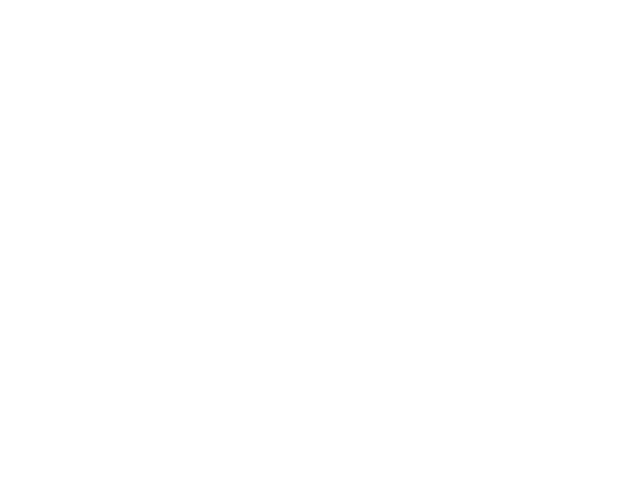

NameError: name 'fruits_dict' is not defined

In [34]:
plt.figure ()
labels =list(fruits_dict.values())

clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=3).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
plot_decision_boundary_universal(clf, X_train, y_train, X_test, y_test, title='GradientBoostingClassifier', precision=0.01, labels= labels, features = features)

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y, labels, features = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
print ('labels:',labels)
print ('features:', features)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

labels: ['malignant' 'benign']
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [36]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf = DecisionTreeClassifier(
    criterion =  'entropy',
    random_state = 0,        
    max_depth = 6,  
).fit(X_train, y_train)
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)

#graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

train accuracy= 99.765%
test accuracy= 95.105%


In [37]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
n_estimators_list= [1,3,5,10,15,25]
max_features_list= list(np.arange(1, X_train.shape[1]+1))
found = False
for i in range (len(n_estimators_list)): 
    
        for j in range (len(max_features_list)):           
            clf = RandomForestClassifier(
                n_estimators= n_estimators_list[i],
                max_features=max_features_list[j], 
                random_state = 0
            ).fit(X_train, y_train)
            
            if round(clf.score(X_train, y_train),5) == 0.99531 and round(clf.score(X_test, y_test),5) == 0.98601:
                print("n_estimators = {0}\tmax_features = {1}".format(clf.n_estimators, clf.max_features))
                found = True
                break 
                
        if found:
            break
# END_CODE

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

n_estimators = 10	max_features = 8
train accuracy= 99.531%
test accuracy= 98.601%


In [38]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
n_estimators_list = [10, 25, 50, 100, 200]
learning_rate_list = [1, 0.1, 0.01, 0.001]
max_depth_list = [1, 2, 3, 5, 7, 10]

found = False
for i in range (len(n_estimators_list)):     
        
        for j in range (len(learning_rate_list)):
            
            for k in range(len(max_depth_list)):
                clf = GradientBoostingClassifier(
                    learning_rate = learning_rate_list[j],
                    max_depth = max_depth_list[k],
                    n_estimators =  n_estimators_list[i],
                    random_state = 0
                ).fit(X_train, y_train)
            
                if round(clf.score(X_train, y_train),5) == 0.97418 and round(clf.score(X_test, y_test),5) == 0.96503:
                    print("n_estimators = {0}\tmax_depth = {1}\tlearning_rate = {2}"
                          .format(clf.n_estimators, clf.max_depth, clf.learning_rate))
                    found = True
                    break 
                    
            if found:
                break
                
        if found:
            break
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

n_estimators = 100	max_depth = 2	learning_rate = 0.01
train accuracy= 97.418%
test accuracy= 96.503%
